<a href="https://colab.research.google.com/github/dariagridina/data/blob/main/proces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix, make_scorer, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import plotly.express as px


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')

In [ ]:
file_path = '/content/drive/MyDrive/salary.csv'
df = pd.read_csv(file_path, na_values=[' ?' ])

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [ ]:
pd.DataFrame({'': df.nunique().index ,
              'Number of unique values':  df.nunique().values})

,,Number of unique values
0,age,73
1,workclass,8
2,fnlwgt,21648
3,education,16
4,education-num,16
5,marital-status,7
6,occupation,14
7,relationship,6
8,race,5
9,sex,2


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df[df.isnull().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
df = df.dropna()
df = df.drop(['fnlwgt'], axis=1)

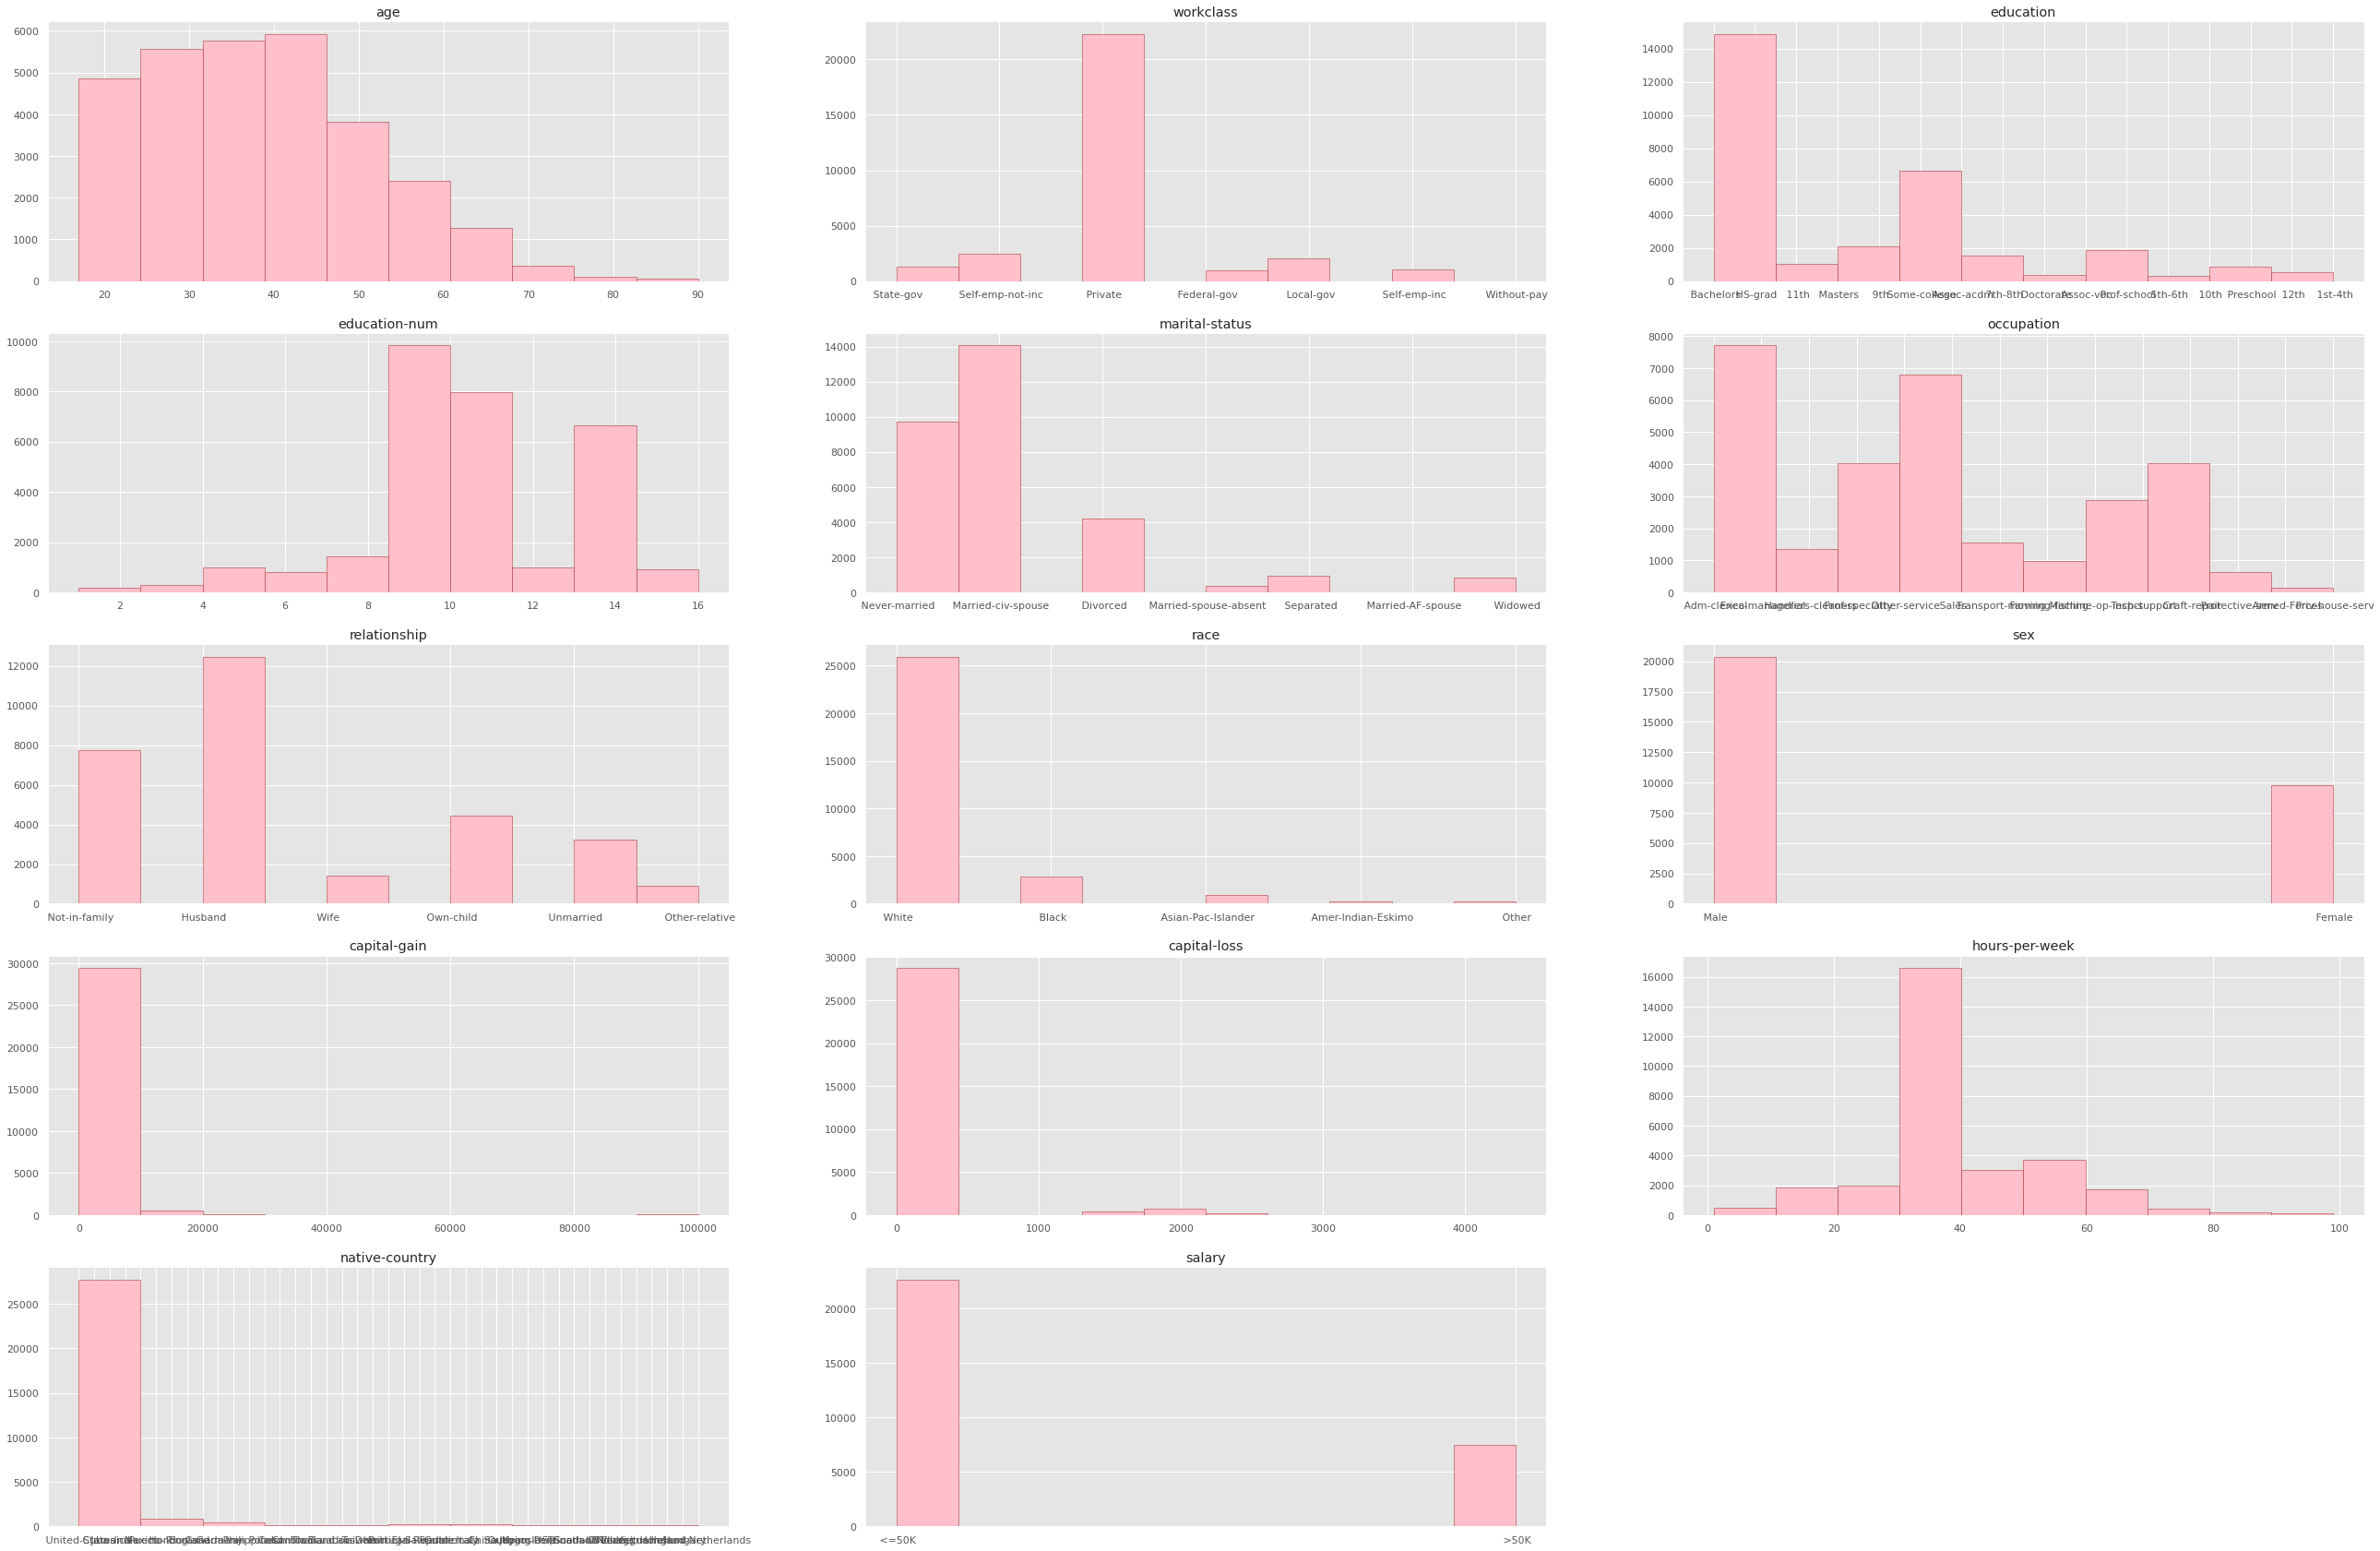

In [ ]:
plt.figure(figsize=(45,30))
for index, column in enumerate(df):
  plt.subplot(5,3, index+1)
  plt.title(column)
  plt.hist(df[column], color='pink', edgecolor='brown')
plt.show()

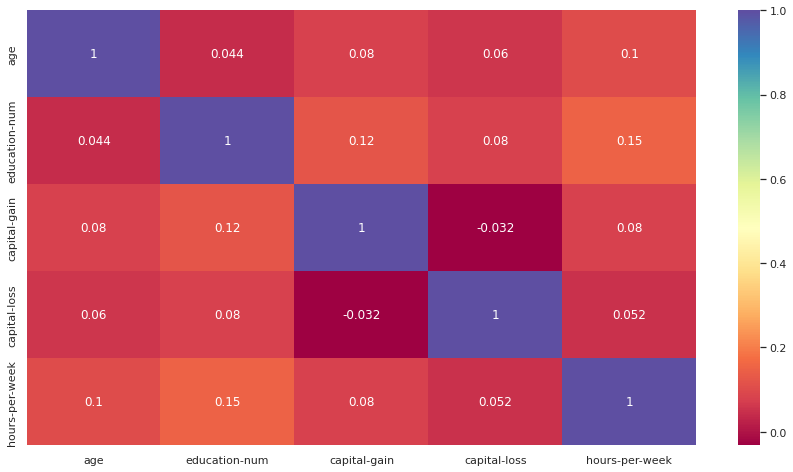

In [ ]:
corr = df.corr()
sns.set(rc = {'figure.figsize': (15, 8)})

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, 
            annot = True, cmap = 'Spectral')

In [ ]:
def normalize_field(dataset, field_name):
    dataset[field_name] = dataset[field_name] / dataset[field_name].max()
    return dataset

In [ ]:
def one_hot_field(dataset, field_name):
    field_one_hot = pd.get_dummies(
        df[field_name],prefix=f'{field_name}=', prefix_sep='')
    dataset = pd.concat([df, field_one_hot], axis=1)
    dataset = dataset.drop([field_name], axis=1)
    return dataset

In [ ]:
def binary_encode_field(dataset, field_name, new_name):
    unique_values = dataset[field_name].unique()
    replace_nums = {field_name: {unique_values[0]: 0, unique_values[1]: 1}}
    dataset = dataset.replace(replace_nums)
    dataset.columns = dataset.columns.str.replace(field_name, new_name)
    return dataset

In [ ]:
numerical_fields = ['age','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_fields = ['workclass', 'education', 'marital-status', 'occupation',
                      'relationship', 'race', 'native-country']
binary_fields = ['sex', 'salary']
new_names = ['is_female', 'salary_greater_than_50k']

In [ ]:
for field in numerical_fields:
    df = normalize_field(df, field)

In [ ]:
for i, field in enumerate(binary_fields):
    df = binary_encode_field(df, field, new_names[i])

In [ ]:
for field in categorical_fields:
    df = one_hot_field(df, field)

In [ ]:
X = df.drop('salary_greater_than_50k', axis=1)
y = df.loc[:,'salary_greater_than_50k']

In [ ]:
fig = px.pie(values=y.value_counts(), width=400, 
             height=400, title='Data Balance')
fig.show()

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
fig = px.pie(values=y_resampled.value_counts(), 
             width=400, height=400, title="Data Balance")
fig.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.2)

## Pipelines

In [ ]:
pipeline_rfc = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

pipeline_rfc.fit(X_train, y_train)
print(f'Score : {pipeline_rfc.score(X_test, y_test):.3f}%')

Score : 0.880%


In [ ]:
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear'))
])

pipeline_lr.fit(X_train, y_train)

print(f'Score : {pipeline_lr.score(X_test, y_test):.3f}%')

Score : 0.856%


### Cross Validation

In [ ]:
scores = cross_val_score(pipeline_rfc, X_resampled, y_resampled, cv=5)
print(f'Accuracy: {scores.mean():.2f} +/- ({scores.std() * 2:.2f})')

Accuracy: 0.88 +/- (0.05)


In [ ]:
scores = cross_val_score(pipeline_lr, X_resampled, y_resampled, cv=5)
print(f'Accuracy: {scores.mean():.2f} +/- ({scores.std() * 2:.2f})')

Accuracy: 0.85 +/- (0.05)


RFC

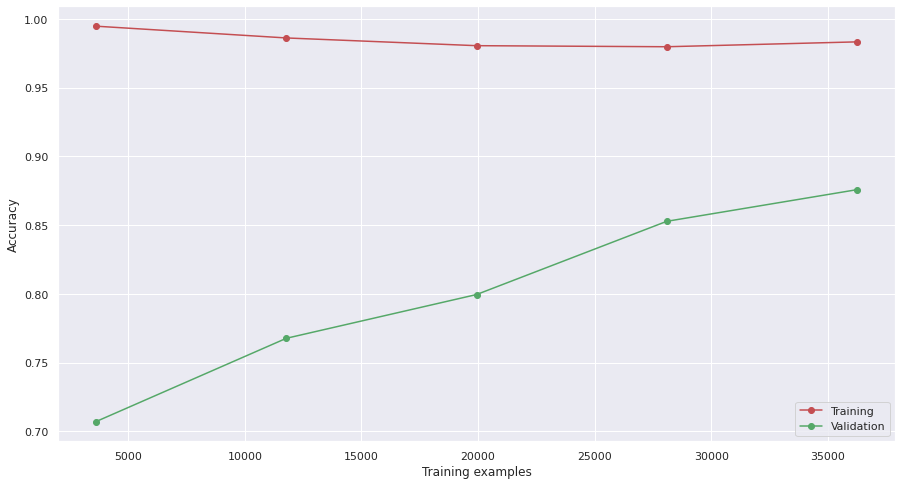

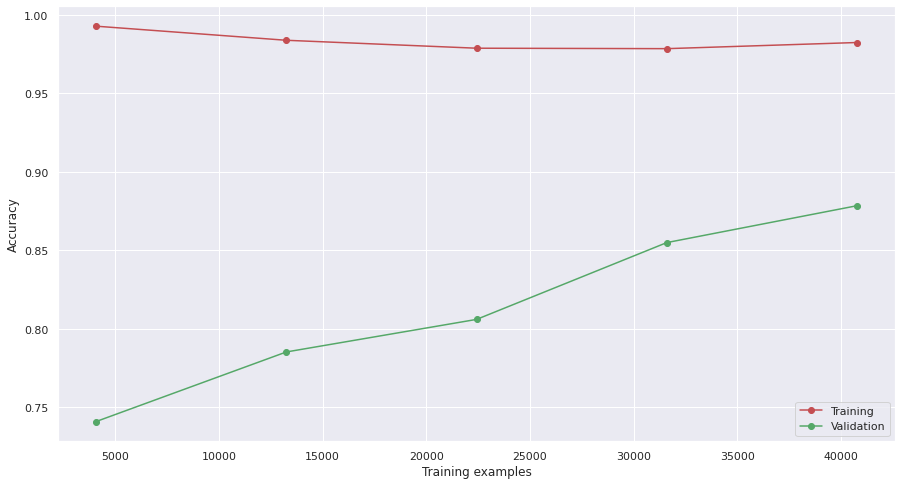

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    pipeline_rfc, X_resampled, y_resampled, cv=5, scoring='accuracy'
)

plt.plot(train_sizes, train_scores.mean(axis=1), 
         'o-', color='r', label='Training')
plt.plot(train_sizes, val_scores.mean(axis=1), 
         'o-', color='g', label='Validation')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


train_sizes, train_scores, val_scores = learning_curve(
    pipeline_rfc, X_resampled, y_resampled, cv=10, scoring='accuracy'
)


plt.plot(train_sizes, train_scores.mean(axis=1), 
         'o-', color='r', label='Training')
plt.plot(train_sizes, val_scores.mean(axis=1), 
         'o-', color='g', label='Validation')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

Logistic Regression

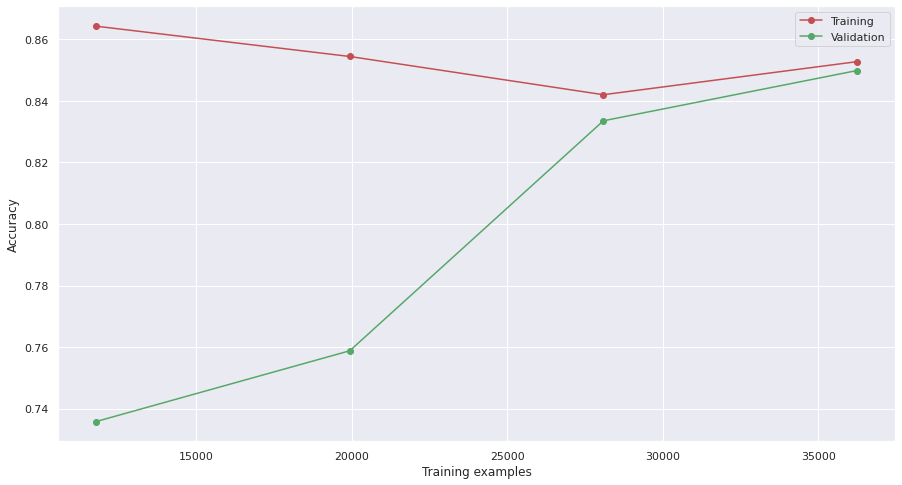

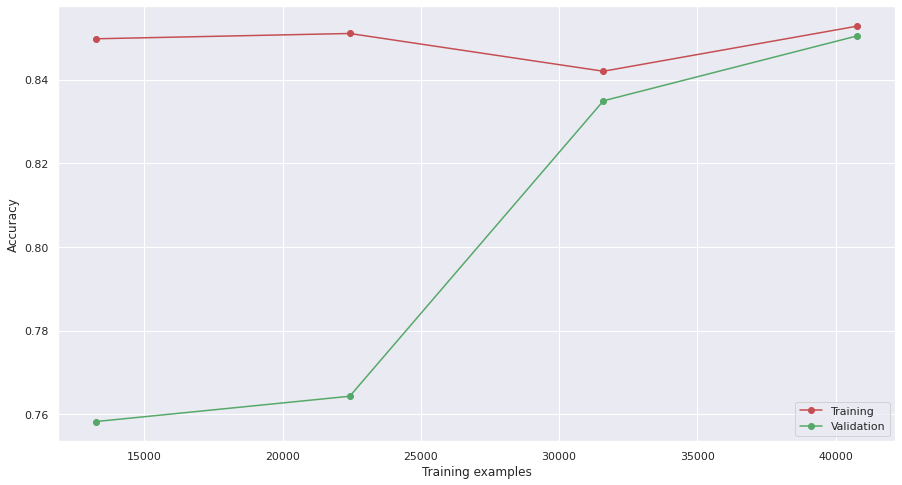

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    pipeline_lr, X_resampled, y_resampled, cv=5, scoring='accuracy'
)


plt.plot(train_sizes, train_scores.mean(axis=1), 
         'o-', color='r', label='Training')
plt.plot(train_sizes, val_scores.mean(axis=1), 
         'o-', color='g', label='Validation')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


train_sizes, train_scores, val_scores = learning_curve(
    pipeline_lr, X_resampled, y_resampled, cv=10, scoring='accuracy'
)


plt.plot(train_sizes, train_scores.mean(axis=1), 
         'o-', color='r', label='Training')
plt.plot(train_sizes, val_scores.mean(axis=1), 
         'o-', color='g', label='Validation')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

RFC

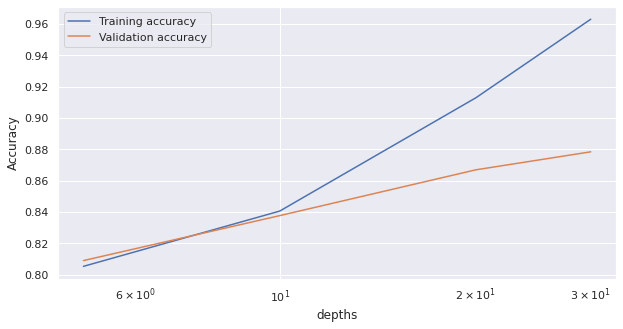

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, 
                                                  test_size=0.2, random_state=42)

depths = [5, 10, 20, 30, None]
train_accuracies = []
val_accuracies = []

for max_depth in depths:
  pipeline_rfc.set_params(classifier__max_depth=max_depth)
  pipeline_rfc.fit(X_train, y_train)
  train_acc = pipeline_rfc.score(X_train, y_train)
  train_accuracies.append(train_acc)

  val_acc = pipeline_rfc.score(X_val, y_val)
  val_accuracies.append(val_acc)

plt.figure(figsize=(10,5))
plt.plot(depths, train_accuracies, label='Training accuracy')
plt.plot(depths, val_accuracies, label='Validation accuracy')
plt.xscale('log')
plt.xlabel('depths')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Logistic Regression

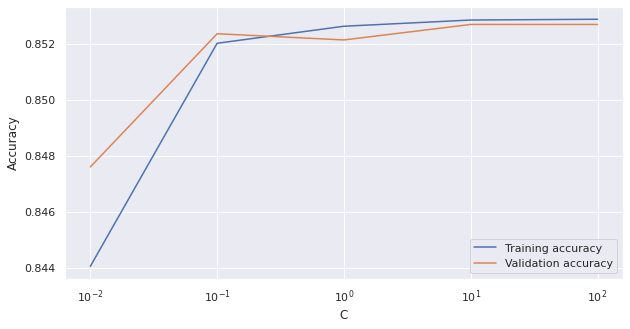

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled,
                                                  test_size=0.2, random_state=42)

Cs = [0.01, 0.1, 1.0, 10.0, 100.0]
train_accuracies = []
val_accuracies = []

for C in Cs:
  pipeline_lr.set_params(classifier__C=C)
  pipeline_lr.fit(X_train, y_train)
  train_acc = pipeline_lr.score(X_train, y_train)
  train_accuracies.append(train_acc)

  val_acc = pipeline_lr.score(X_val, y_val)
  val_accuracies.append(val_acc)

plt.figure(figsize=(10,5))
plt.plot(Cs, train_accuracies, label='Training accuracy')
plt.plot(Cs, val_accuracies, label='Validation accuracy')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Scores & Confusion Matrix

RFC

In [ ]:
pipeline_rfc.fit(X_train, y_train)
y_pred_rfc = pipeline_rfc.predict(X_test)
matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

In [ ]:
print(f'Precicion score is: {precision_score(y_test, y_pred_rfc):.3f}')

Precicion score is: 0.958


In [ ]:
print(f'Recall score is: {recall_score(y_test, y_pred_rfc):.3f}')

Recall score is: 0.971


In [ ]:
print(f'F1 score is: {f1_score(y_test, y_pred_rfc):.3f}')

F1 score is: 0.964


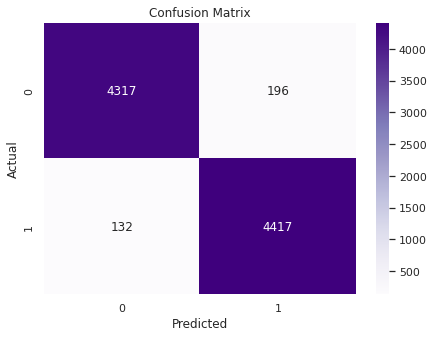

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(matrix_rfc, annot=True, fmt='d', cmap='Purples')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression

In [ ]:
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
matrix_lr = confusion_matrix(y_test, y_pred_lr)

In [ ]:
print(f'Precicion score is: {precision_score(y_test, y_pred_lr):.3f}')

Precicion score is: 0.840


In [ ]:
print(f'Recall score is: {recall_score(y_test, y_pred_lr):.3f}')

Recall score is: 0.883


In [ ]:
print(f'F1 score is: {f1_score(y_test, y_pred_lr):.3f}')

F1 score is: 0.861


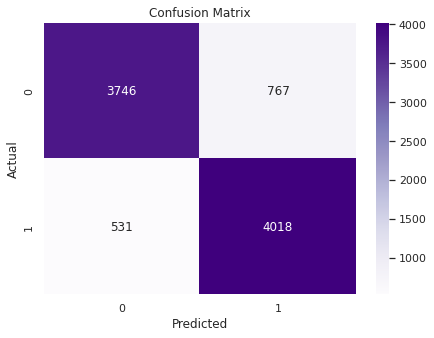

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(matrix_lr, annot=True, fmt='d', cmap='Purples')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Best Hyperparameters Search

In [ ]:
class PipelineEvaluator:
    def __init__(self, pipeline, param_grid):
        self.pipeline = pipeline
        self.param_grid = param_grid
        
    def evaluate(self, X_train, y_train, X_test, y_test):
        gs = GridSearchCV(estimator=self.pipeline, param_grid=self.param_grid, 
                          scoring='accuracy', cv=5, n_jobs=-1)
        gs = gs.fit(X_train, y_train)

        self.best_score_ = gs.best_score_
        self.best_params_ = gs.best_params_
        self.scores_mean = np.mean(gs.cv_results_['mean_test_score'])
        self.scores_std = np.std(gs.cv_results_['std_test_score'])
        clf = gs.best_estimator_
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        return score

RFC

In [ ]:
param_grid_rfc = {
    'classifier__n_estimators': [10, 100, 200],
    'classifier__max_depth': [10, 20, 30, 40],
    'classifier__criterion': ['gini', 'entropy']
}

In [ ]:
evaluator = PipelineEvaluator(pipeline_rfc, param_grid_rfc)
score_rfc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print(f'Cross-validation accuracy is: {evaluator.scores_mean:.3f} \
+/- {evaluator.scores_std:.3f}')

Cross-validation accuracy is: 0.858 +/- 0.001


In [ ]:
best_params_rfc = evaluator.best_params_
best_params_rfc

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 40,
 'classifier__n_estimators': 200}

Logistic Regression

In [ ]:
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

In [ ]:
evaluator = PipelineEvaluator(pipeline_lr, param_grid_lr)
score_lr = evaluator.evaluate(X_train, y_train, X_test, y_test)
print(f'Cross-validation accuracy is: {evaluator.scores_mean:.3f} \
+/- {evaluator.scores_std:.3f}')

Cross-validation accuracy is: 0.841 +/- 0.001


In [ ]:
best_params_lr = evaluator.best_params_
best_params_lr

{'classifier__C': 1, 'classifier__penalty': 'l2'}

## F1 scorer

RFC

In [ ]:
f1_scorer = make_scorer(f1_score, pos_label=0, greater_is_better=True)

gs = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid_rfc, 
                          scoring=f1_scorer, cv=10)
gs = gs.fit(X_train, y_train)

In [ ]:
print(f'Best score: {gs.best_score_:.3f}')

Best score: 0.876


In [ ]:
print(f'Best params: {gs.best_params_}')

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 40, 'classifier__n_estimators': 200}


ROC AUC

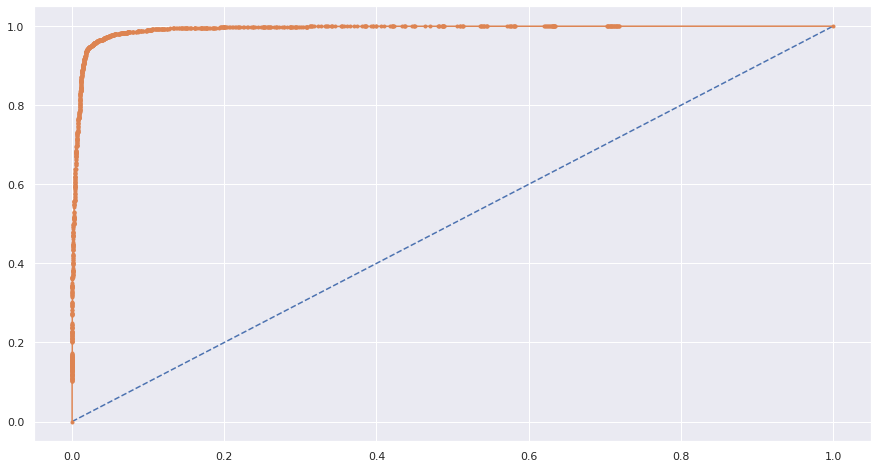

In [ ]:
probs = gs.best_estimator_.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, probs).round(3)

0.992

Logistic Regression

In [ ]:
gs = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, 
                          scoring=f1_scorer, cv=10)
gs = gs.fit(X_train, y_train)

In [ ]:
print(f'Best score: {gs.best_score_:.3f}')

Best score: 0.847


In [ ]:
print(f'Best params: {gs.best_params_}')

Best params: {'classifier__C': 10, 'classifier__penalty': 'l2'}


ROC AUC

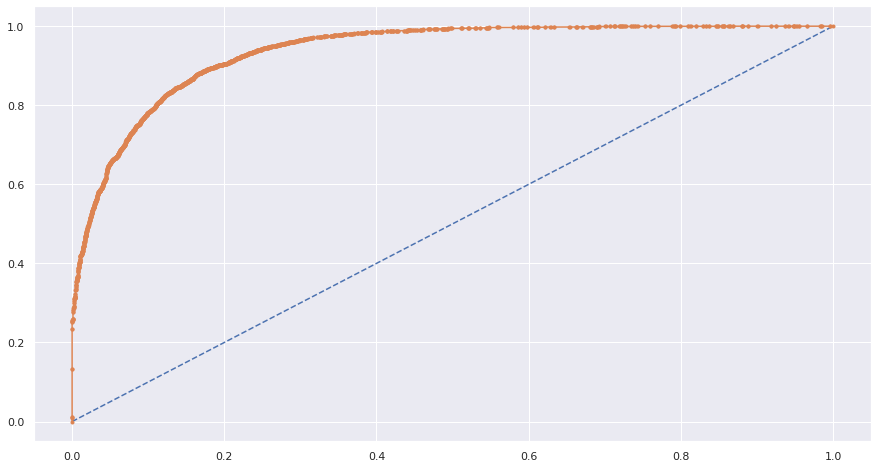

In [ ]:
probs = gs.best_estimator_.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, probs).round(3)

0.936

## Precision scorer

RFC

In [ ]:
pre_scorer = make_scorer(precision_score,
                             pos_label=1,
                             greater_is_better=True)

In [ ]:
gs = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid_rfc, 
                          scoring=pre_scorer, cv=10)
gs = gs.fit(X_train, y_train)

In [ ]:
print(f'Best score: {gs.best_score_:.3f}')

Best score: 0.862


In [ ]:
print(f'Best params: {gs.best_params_}')

Best params: {'classifier__criterion': 'gini', 'classifier__max_depth': 40, 'classifier__n_estimators': 10}


ROC AUC

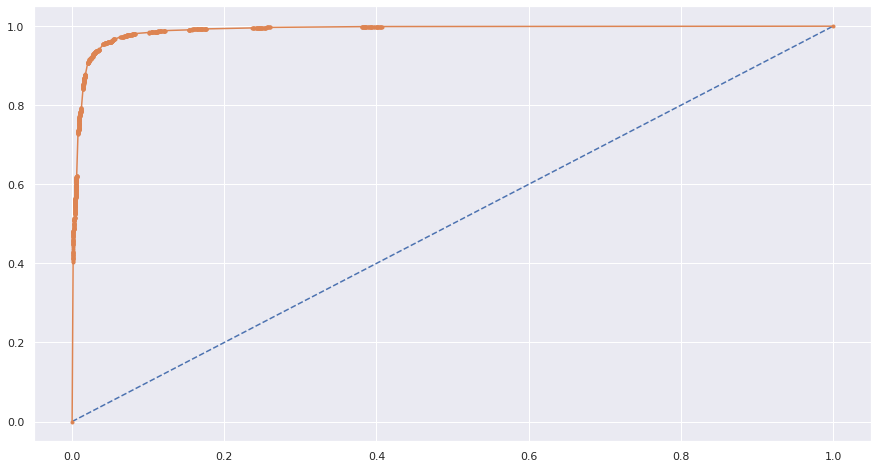

In [ ]:
probs = gs.best_estimator_.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, probs).round(3)

0.989

Logistic Regression

In [ ]:
gs = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, 
                          scoring=pre_scorer, cv=10)
gs = gs.fit(X_train, y_train)

In [ ]:
print(f'Best score: {gs.best_score_:.3f}')

Best score: 0.834


In [ ]:
print(f'Best params: {gs.best_params_}')

Best params: {'classifier__C': 100, 'classifier__penalty': 'l2'}


ROC AUC

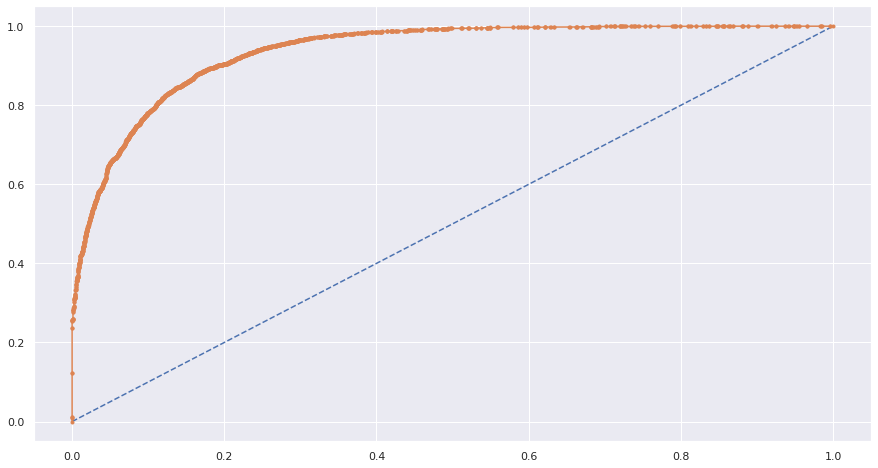

In [ ]:
probs = gs.best_estimator_.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, probs).round(3)

0.936

### Recall scorer

RFC

In [ ]:
recall_scorer = make_scorer(recall_score, greater_is_better=True, pos_label=1)

In [ ]:
gs = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid_rfc, 
                          scoring=recall_scorer, cv=10)
gs = gs.fit(X_train, y_train)

In [ ]:
print(f'Best score: {gs.best_score_:.3f}')

Best score: 0.920


In [ ]:
print(f'Best params: {gs.best_params_}')

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 30, 'classifier__n_estimators': 200}


ROC AUC

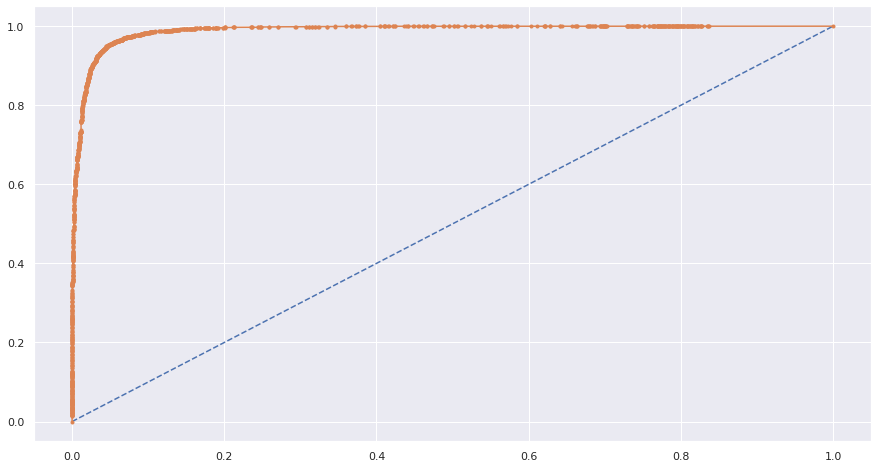

In [ ]:
probs = gs.best_estimator_.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, probs).round(3)

0.989

Logistic Regression

In [ ]:
gs = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, 
                          scoring=recall_scorer, cv=10)
gs = gs.fit(X_train, y_train)

In [ ]:
print(f'Best score: {gs.best_score_:.3f}')

Best score: 0.880


In [ ]:
print(f'Best params: {gs.best_params_}')

Best params: {'classifier__C': 0.1, 'classifier__penalty': 'l1'}


ROC AUC

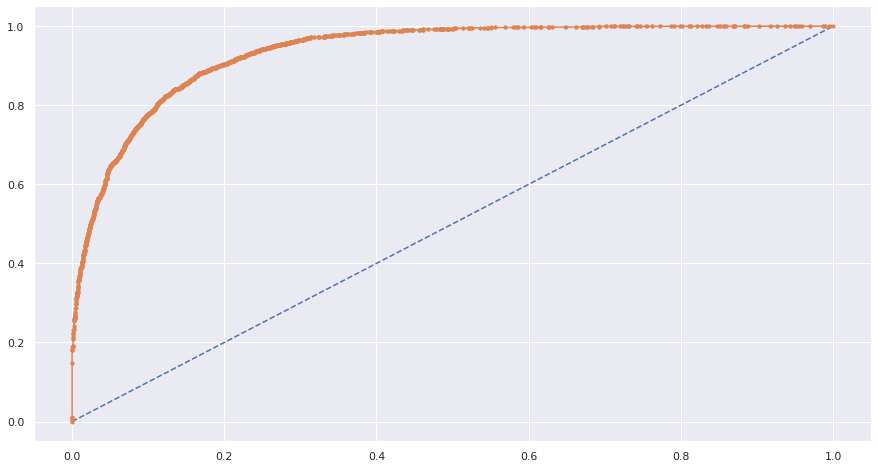

In [ ]:
probs = gs.best_estimator_.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, probs).round(3)

0.935

## Wybrany model

In [ ]:
pipeline_best = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=40,
                                          criterion='entropy'))
])

pipeline_best.fit(X_train, y_train)
y_pred_best = pipeline_best.predict(X_test)

f1 = f1_score(y_test, y_pred_best)
print(f'F1 score: {round(f1, 3)}%')
print(f'ROC AUC score is: {roc_auc_score(y_test, y_pred_best):.3f}%')

F1 score: 0.964%
ROC AUC score is: 0.963%


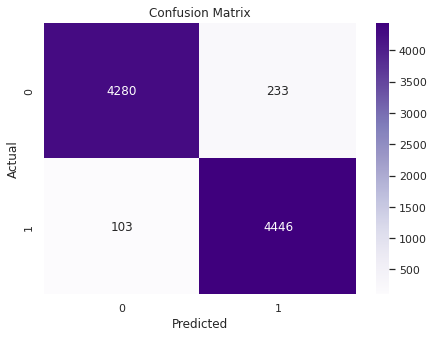

In [ ]:
matrix_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(7,5))
sns.heatmap(matrix_best, annot=True, fmt='d', cmap='Purples')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()